In [4]:
import pandas as pd 
import datetime, os, warnings;  warnings.filterwarnings('ignore')
from meteo import read_meteo
from AE33 import read_ae33
meteoinfo = read_meteo()
ae33info  = read_ae33()
df_combine = pd.merge(meteoinfo,ae33info,on='Dateandtime')
pd.set_option('display.max_rows', None)       #显示所有行
pd.set_option('display.max_columns', None)    #显示所有列
del meteoinfo,ae33info
# df_combine
from AE33 import create_plot,wavelengths,units
x = df_combine.Dateandtime
y1= df_combine.orient_relative
lamda:int=880   # Select the wavelength to read
# Select the target data（range：BCXX,BCX,BB）
# BCkey = 'BB'
BCkey = str(wavelengths.get(lamda))
if BCkey!='BB':
    y = df_combine[BCkey]/1000  # unit conversion: ng/m3->μg/m3     
# unit
unit = units.get(BCkey) 
# plot title                 
plotTitle = "Aethalometer Model AE33"
if BCkey!='BB':
    plotTitle = plotTitle + " ($\lambda=$" + str(lamda) + "nm)"
# Y-axis title
if BCkey=='BB':
    ytitle = "Biomass Burning Fraction"
else:
    ytitle="Equivalent Black Carbon"
create_plot(x, y, yunits=unit, title=plotTitle, ytitle=ytitle, y1=y1)

In [7]:
import numpy as np
np.cos(np.pi/2)

6.123233995736766e-17

In [1]:
from combin2calcu import main
df=main()

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size']=9
plt.rcParams['font.family'] = 'Times New Roman' 
df = pd.read_csv('./BCvsMeteo.csv',header=0)
df['area']=df['lat'].apply(lambda x:'YS' if (x>=32.5) else 'ECS')
df.groupby('area')
df_ys=df.groupby('area').get_group('YS').drop(labels=['area','lat','lon'], axis=1)
df_ys.columns=['BC','Pressure','Temperature','RH','Wind speed']
df_ys.to_csv('BCvsMeteo_YS.csv',index=False)

df_ecs=df.groupby('area').get_group('ECS').drop(labels=['area','lat','lon'], axis=1)
df_ecs.columns=['BC','Pressure','Temperature','RH','Wind speed']
df_ecs.to_csv('BCvsMeteo_ECS.csv',index=False)

In [14]:
df_coor=df_ys.corr(method='pearson')
df_coor

,BC,Pressure,Temperature,RH,Wind speed
BC,1.000000,0.450776,-0.186883,-0.048360,0.481367
Pressure,0.450776,1.000000,-0.006592,-0.038387,0.259784
Temperature,-0.186883,-0.006592,1.000000,-0.248278,-0.230848
RH,-0.048360,-0.038387,-0.248278,1.000000,0.053078
Wind speed,0.481367,0.259784,-0.230848,0.053078,1.000000


In [2]:
def pvalue_marker(pval, corr=None, only_pos=False):
    if only_pos:  # 只标记正相关
        if corr is None:  
            print('correlations `corr` is not provided, '
                  'negative correlations cannot be filtered!')
        else:
            pval = pval + (corr < 0).astype(float)
    pval_marker = pval.applymap(lambda x: '**' if x < 0.01 else ('*' if x < 0.05 else ''))
    return pval_marker

<AxesSubplot:>

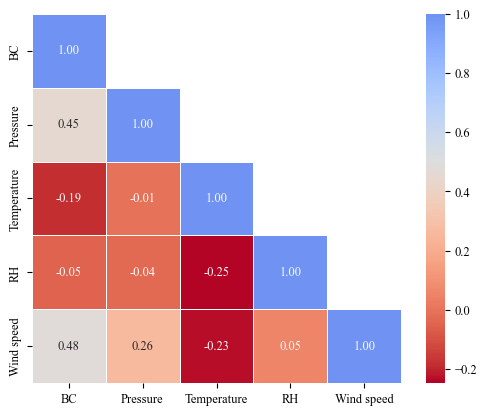

In [20]:
cor = df_ys.corr(method='pearson')
sns.heatmap(cor,
            annot=True,  # 显示相关系数的数据
            mask=mask,
            center=0.5,  # 居中
            fmt='.2f',  # 只显示两位小数
            linewidth=0.5,  # 设置每个单元格的距离
            linecolor='white',  # 设置间距线的颜色
            # vmin=0, vmax=1,  # 设置数值最小值和最大值
            xticklabels=True, yticklabels=True,  # 显示x轴和y轴
            square=True,  # 每个方格都是正方形
            cbar=True,  # 绘制颜色条
            cmap='coolwarm_r',  # 设置热力图颜色
            )
# https://blog.csdn.net/weixin_39166189/article/details/122860178